# Линейная алгебра. Лабораторная работа 1, осень 2025


## Часть 1. Библиотеки

В этой лабораторной работе вам понадобятся три библиотеки:

- `numpy` – основная библиотека для работы с матрицами;
- `scipy`, а точнее модуль `scipy.linalg`, содержащий множество функций линейной алгебры;
- `matplotlib` – графическая библиотека

Подключить их можно следующим образом:

In [119]:
# Запустите этот код
import numpy as np

import scipy.linalg as sla

import matplotlib.pyplot as plt
%matplotlib inline

Теперь вы можете позвать, скажем, функцию `scipy.linalg.det()` с помощью кода `sla.det()`, а функцию `numpy.exp()` – с помощью кода `np.exp()`.

**Основные объекты и операции линейной алгебры в NumPy и SciPy:**

Основной объект, с которым вам придётся работать и в этой, и в следующих лабораторных, – это, безусловно, матрицы. В библиотеке `numpy` они представлены классом `numpy.ndarray`. Матрицу можно создать из двумерного (а на самом деле и не только двумерного) массива следующим образом:

In [120]:
# Запустите этот код
A = np.array([[1, 2, 3], [4, 5, 6]])

print(A)
print(A.shape) # пара (число строк, число столбцов)

[[1 2 3]
 [4 5 6]]
(2, 3)


Обратите внимание, что матрица заполняется по умолчанию *по строкам*.

Есть и много других конструкторов матриц. Например, единичная матрица размера $n\times n$ создаётся с помощью функции `numpy.eye(n)`. Со всем многообразием конструкторов можно ознакомиться [на этой странице](https://numpy.org/doc/stable/reference/routines.array-creation.html).

Зачастую бывает нужно получить доступ к подматрицам данной матрицы, и numpy предоставляет множество удобных средств, как это сделать, аналогичных slicing для списков базового Python, но отчасти расширяющих их (при желании см. [документацию](https://numpy.org/doc/stable/user/basics.indexing.html#basics-indexing)):
- элемент с номером `(i,j)`: `A[i,j]`; <small>*работает и `A[i][j]`, но менее эффективно (создаётся промежуточный одномерный массив `A[i]`, прежде чем взять из него j-й элемент)*</small>
- i-я строка матрицы: `A[i,:]`
- j-й столбец матрицы: `A[:,j]`

**Внимание!** Оба варианта, и `A[i,:]`, и `A[:,j]` дают не строку или столбец, а одномерный вектор. Если вы хотите получить вектор-строку или вектор-столбец соответственно, используйте вот такой синтаксис: `A[i:i+1,:]` и `A[:,j:j+1]`
- строки с нулевой по i-ю: `A[:i+1,:]`
- столбцы с j-го по последний: `A[:,j:]`
- строки с i-й по k-ю: `A[i:k,:]`

Обратите внимание, что эти методы как правило возвращают view, а не copy (<small>*есть исключения, при желании см. [advanced-indexing](https://numpy.org/doc/stable/user/basics.indexing.html#advanced-indexing)*</small>), то есть если, например, изменить что-то в `A[i, :]`, то изменится исходная матрица `A`.

В некоторых случаях нужно получить доступ к (прямоугольной) подматрице, элементы которой находятся на пересечении строк из списка `rows` и столбцов из списка `columns`. В этом случае `A[rows, columns]` даст не то, что вы ожидаете (можете попробовать это сделать сами и увидеть, что получится; только возьмите `rows` и `columns` одного размера). Справиться с этой задачей позволяет код `A[np.ix_(rows, columns)]`

*Умножение матриц* производится с помощью функции `np.dot()` либо оператора `@`. Есть три варианта написания: `A.dot(B)`, `np.dot(A, B)` и `A @ B`.

Обычные знаки арифметических действий (`+`, `-`, `*`) зарезервированы для поэлементных операций. Например, `A * B` – это матрица, элементами которой являются произведения $A_{ij}B_{ij}$. <small>*Помимо этих есть и множество других поэлементных операций. Например, `numpy.exp(A)` – это матрица, элементами которой являются экспоненты элементов матрицы `A`. Не путать с `sla.expm(A)` – настоящей матричной экспонентой, которую мы будем обсуждать в весеннем семестре.*</small>

Чтобы получить матрицу, *транспонированную* к матрице `A`, напишите просто `A.T`.

В некоторых случаях бывает нужно создавать *случайные матрицы*: например, при проведении экспериментов или для инициализации итеративных методов. Средства для этого предоставляет пакет [numpy.random](https://docs.scipy.org/doc/numpy/reference/routines.random.html). Так, `np.random.rand(m,n)` – это матрица $m\times n$, элементы которой независимо выбраны из равномерного распределения на интервале `[0;1)`.

Для *решения систем линейных уравнений* в пакете `scipy.linalg` есть множество методов, рассмотрение которых выходит за пределы стандартного курса линейной алгебры. Мы вам пока предлагаем пользоваться функцией `scipy.linalg.solve`, основанной на методе Гаусса. Отметим, что `scipy.linalg.solve(A, B)` выдаёт решение уравнения $AX = B$ (или ошибку), где $B$ может быть как вектором, так и матрицей.

Найти обратную матрицу для матрицы $A$ можно с помощью функции `sla.inv(A)`.

**Копирование сложных объектов в Python**

Когда вы делаете присваивание каких-то сложных объектов, как правило, оно происходит по ссылке. Например, код
```
B = A
B[0,0] = 10
```
приведёт к изменению матрицы `A`.

Не попадайтесь в эту ловушку! Если вы хотите работать с копией как с независимой матрицей, используйте метод `copy()`:
```
B = A.copy()
```

**Где искать помощь**

Библиотеки `numpy` и `scipy` снабжены прекрасной документацией. Если у вас возникают вопросы о том, как работает та или иная функция (или даже как называется функция, выполняющая то, что вам нужно), вы почти всегда можете найти там ответы.

[Ссылка на документацию пакета scipy.linalg](https://docs.scipy.org/doc/scipy-0.18.1/reference/linalg.html)

Если у вас возникает какая-то ошибка и вы не можете понять, что вы делаете не так, то

1) в первую очередь попробуйте просто загуглить текст ошибки, наверняка в интернете кто-то уже сталкивался с такой ситуацией;  
2) поспрашивайте своих одногруппников, не было ли у них такой ошибки, и если была, то как они справлялись;  
3) попросите помощи у вашего учебного ассистента.




**И всё-таки задание**

**Задание 1.1 [0.25 балла за каждый пункт]** В качестве первого задания мы попросим вас отыскать соответствующие функции в библиотеке и сделать следующее:

- создайте нулевую матрицу $Z$ размера $3\times4$;

- создайте нулевую матрицу $Y$ размера $4\times1$ и найдите произведение $ZY$;

- создайте диагональную матрицу $D$ размера $5\times5$ с диагональными элементами 1, 2, 3, 4 и 5;

- найдите её след $\operatorname{tr}(D)$ (не силою мысли, а с помощью библиотечных функций, конечно);

- найдите обратную к ней матрицу $D^{-1}$;

- сгенерируйте случайную матрицу $X$ размера $4\times5$;

- найдите определитель подматрицы матрицы $X$, расположенной на пересечении 2-й и 3-й строк и 1-го и 2-го столбцов; считаем, что строки и столбцы нумеруются с единицы (используйте slicing!). Такой определитель называется **минором** матрицы $X$;

- найдите произведение $X^TX$.

Пожалуйста, каждый пункт делайте в новом блоке и не забывайте выводить результаты.

In [121]:
Z = np.zeros((3, 4))
Y = np.zeros((4, 1))
D = np.diag([1, 2, 3, 4, 5])
trace_D = np.trace(D)
D_inv = sla.inv(D)

X = np.random.rand(4, 5)
submatrix = X[1:3, 0:2]
minor = sla.det(submatrix)
XTX = X.T @ X

print(np.dot(Z, Y))
print(trace_D)
print(D_inv)
print(minor)
print(XTX)

[[0.]
 [0.]
 [0.]]
15
[[ 1.          0.          0.          0.         -0.        ]
 [ 0.          0.5         0.          0.         -0.        ]
 [ 0.          0.          0.33333333  0.         -0.        ]
 [ 0.          0.          0.          0.25       -0.        ]
 [ 0.          0.          0.          0.          0.2       ]]
0.3516645012056378
[[1.91341982 1.44057833 0.78318898 1.2309926  1.12927367]
 [1.44057833 1.38029498 0.43798742 1.12173962 0.74221419]
 [0.78318898 0.43798742 0.43977013 0.41343187 0.54344137]
 [1.2309926  1.12173962 0.41343187 0.93653858 0.68987045]
 [1.12927367 0.74221419 0.54344137 0.68987045 0.78102322]]


## Часть 2. Время

Питон мотивирует пользоваться библиотечными функциями, когда они доступны, а не писать собственные. Библиотечные функции основаны на современных алгоритмах, обычно пишутся на более эффективных языках, таких как C++ или Fortran, а кроме того, оптимизированы для работы на многопроцессорных устройствах, так что обогнать эти решения просто так вы не сможете. Мы предлагаем вам убедиться в этом самим. Напишите функцию `my_det`, которая вычисляла бы определитель матрицы с помощью элементарных преобразований над строками.

**Задание 2.1 [1 балл]**
Для разминки реализуйте одно элементарное преобразование: прибавьте третью строку данной матрицы ко второй с коэффициентом 3. Не используйте циклов; для естественного решения достаточно одной строки.

In [122]:
A = np.array([[1,2,3],[4,5,6],[7,8,9]])
A[1, :] += 3 * A[2, :]
print(A)

[[ 1  2  3]
 [25 29 33]
 [ 7  8  9]]


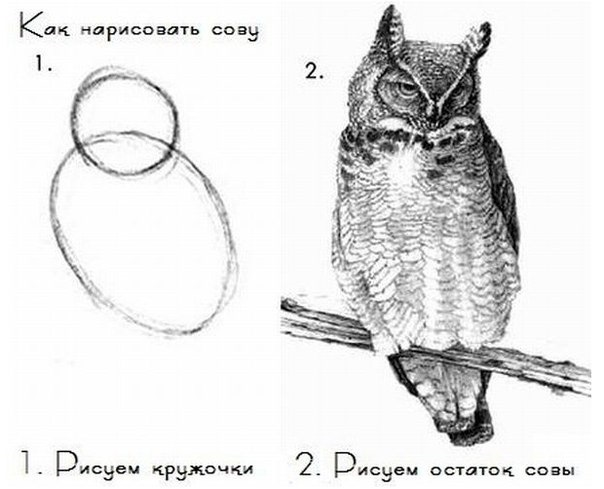

**Задание 2.2 [1 балл]**
Теперь реализуйте функцию `my_det`, вычисляющую определитель. Функция должна выкидывать `ValueError` в случаях, если матрица не является квадратной. Функция не должна быть деструктивной – исходная матрица не должна измениться.

In [123]:
def my_det(X):
    '''
    Parameters
    ----------
    X : array_like

    Returns
    -------
    det : float
        Determinant of `a`.
    '''
    if X.ndim != 2 or X.shape[0] != X.shape[1]:
        raise ValueError("Матрица не является квадратной")

    A = X.copy().astype(float)
    n = A.shape[0]

    sign = 1

    for col in range(n):
        max_row = col
        for row in range(col + 1, n):
            if abs(A[row, col]) > abs(A[max_row, col]):
                max_row = row

        if abs(A[max_row, col]) < 1e-12:
            return 0.0

        if max_row != col:
            A[[col, max_row]] = A[[max_row, col]]
            sign *= -1

        for row in range(col + 1, n):
            if A[col, col] != 0:
                factor = A[row, col] / A[col, col]
                A[row, :] -= factor * A[col, :]

    det = sign * np.prod(np.diag(A))

    return det

Простая проверка:

In [124]:
# Запустите этот блок кода
X = np.array([[0,0,1], [0,1,0], [1,0,0]])
print(my_det(X))

-1.0


На случай, если нам просто повезло с этой матрицей, имеет смысл написать чуть более хитрые тесты. Мы сгенерируем несколько случайных матриц $50\times50$ с помощью функции `numpy.random.rand` и сравним ответ, выдаваемый нашей функцией, с настоящим определителем (результатом работы библиотечной функции `scipy.linalg.det`):

In [125]:
# Запустите этот блок кода
for _ in range(50):
    X = np.random.rand(50, 50)
    my = my_det(X)
    actual = sla.det(X)
    if (not (np.abs(my) < 1e-6 and np.abs(actual) < 1e-6)) and np.abs(my - actual)/actual > 1e-6:
        print(X)
        print(my_det(X))
        print(sla.det(X))
        print('FAILED')

Если вы ни разу не получили `FAILED`, то ваша функция работает правильно.

<small>Обратите внимание на способ сравнения: проверка на точное равенство не подходит из-за машинной точности; см. следующее задание.</small>

Теперь давайте сравним скорость работы вашей функции и библиотечной функции `scipy.linalg.det`. В Питоне есть несколько способов измерения времени; мы воспользуемся декоратором `%timeit`. Будучи написан перед функцией, он запускает её некоторое количество раз, выбирает три случайных запуска и возвращает длительность самого быстрого из них. <small>Вопрос для размышления: зачем запускать много раз, если рассматривать только три из этих запусков?..</small> Модификатор `-o` между декоратором и функцией позволяет сохранять результаты работы декоратора в переменную.

Приготовьтесь, что следующий блок может работать сравнительно долго.

3.97 μs ± 55.9 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
91.2 μs ± 575 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
52.7 μs ± 143 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
7.38 ms ± 24.4 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
12.4 ms ± 701 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
939 ms ± 2.49 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


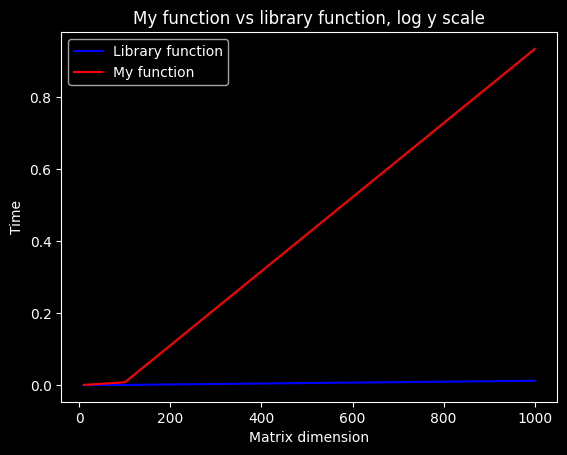

In [126]:
# Запустите этот блок кода
lib_times = []
my_times = []
dimensions = [10, 100, 1000]
for dim in dimensions:
    A = np.random.rand(dim, dim)
    res_lib = %timeit -o sla.det(A)
    lib_times.append(res_lib.best)
    res_my = %timeit -o my_det(A)
    my_times.append(res_my.best)

plt.plot(dimensions, lib_times, color='blue', label='Library function')
plt.plot(dimensions, my_times, color='red', label='My function')
plt.title('My function vs library function, log y scale')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

У вас должны были получиться графики, показывающие, как растёт с ростом размерности матрицы время вычисления определителя. Поскольку они вышли не больно-то красивыми, мы нарисуем их в *логарифмическом масштабе* по оси у:

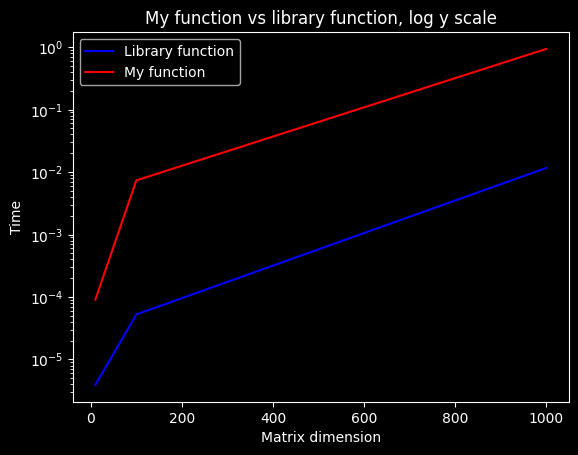

In [127]:
# Запустите этот блок кода
plt.semilogy(dimensions, lib_times, color='blue', label='Library function')
plt.semilogy(dimensions, my_times, color='red', label='My function')
plt.title('My function vs library function, log y scale')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

Вы можете убедиться, что библиотечная функция работает *гораздо* быстрее.

## Часть 3. Точность

Наверняка вы уже что-то знаете про floating point arithmetics и связанные с этим трудности и понимаете, что на компьютере вычисления с вещественными числами производятся лишь с ограниченной точностью.

**Задание 3.1 [1 балл]** В качестве первого примера, показывающего различие между длинной арифметикой целых чисел и floating point arithmetics, предлагаем вам перемножить две пары матриц:

$$
\begin{pmatrix}
1 & 0\\
10^{20} & 1
\end{pmatrix}
\cdot
\begin{pmatrix}
10^{-20} & 1\\
0 & 1 - 10^{20}
\end{pmatrix}
$$
и
$$
\begin{pmatrix}
1. & 0.\\
10.^{20} & 1.
\end{pmatrix}
\cdot
\begin{pmatrix}
10.^{-20} & 1.\\
0. & 1. - 10.^{20}
\end{pmatrix}
$$
Во втором случае мы специально указали Питону (поставив везде десятичные точки), что хотим работать не с целыми числами, а с числами с плавающей точкой. Посмотрим, получатся ли одинаковые ответы:

In [128]:
A1_int = np.array([[1, 0], [10**20, 1]], dtype=object)
B1_int = np.array([[10**(-20), 1], [0, 1 - 10**20]], dtype=object)
result_int = A1_int @ B1_int
print(result_int)
print("-----")
A1_float = np.array([[1., 0.], [10.**20, 1.]])
B1_float = np.array([[10.**(-20), 1.], [0., 1. - 10.**20]])
result_float = A1_float @ B1_float
print(result_float)

[[1e-20 1]
 [1.0 1]]
-----
[[1.e-20 1.e+00]
 [1.e+00 0.e+00]]


И какой из них правильный?

---
Наверное первый с целыми чилами, скореее всего из за потери точности (catastrophic cancellation)

**Задание 3.2 [1 балл]** Впрочем, и с целыми числами тоже не всегда всё хорошо. Напишите функцию, генерирующую *матрицу Паскаля* заданной размерности $n$, то есть матрицу $P$, в которой $P_{ij} = C_{i+j}^i$. В этом задании нельзя пользоваться библиотечной функцией `scipy.linalg.pascal` или её аналогами из других библиотек. Обратите внимание, что использование факториалов крайне нежелательно, так как быстро приведёт к переполнению.

В этом задании вы можете использовать цикл ``for``.

In [129]:
def my_pascal(dim):
    '''
    Мы создали для вас матрицу из нулей размера dim x dim,
    но вы можете ей не пользоваться, если не хотите
    '''
    P = np.zeros((dim, dim))

    P[:, 0] = 1
    P[0, :] = 1

    for i in range(1, dim):
        for j in range(1, dim):
            P[i, j] = P[i-1, j] + P[i, j-1]

    return P

Чему равен её определитель? **Строго** поясните свой ответ. Вы можете поискать в интернете информацию о матрице Паскаля, но потом напишите самостоятельно полное решение.

----

**Определитель матрицы Паскаля = 1**

Матрицу Паскаля можно представить как P = L * L^T, где L - нижнетреугольная матрица (тоже из биномиальных коэффициентов). На диагонали L стоят единицы (C(0,0), C(1,1), C(2,2), ...), значит det(L) = 1.

Тогда det(P) = det(L) * det(L^T) = 1 * 1 = 1.

А теперь вычислите определитель матрицы Паскаля $30\times30$ с помощью библиотечной функции `scipy.linalg.det`:

In [130]:
P30 = my_pascal(30)
det_P30 = sla.det(P30)
print(P30)
print(det_P30)

[[1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00]
 [1.00000000e+00 2.00000000e+00 3.00000000e+00 4.00000000e+00
  5.00000000e+00 6.00000000e+00 7.00000000e+00 8.00000000e+00
  9.00000000e+00 1.00000000e+01 1.10000000e+01 1.20000000e+01
  1.30000000e+01 1.40000000e+01 1.50000000e+01 1.60000000e+01
  1.70000000e+01 1.80000000e+01 1.90000000e+01 2.00000000e+01
  2.10000000e+01 2.20000000e+01 2.30000000e+01 2.40000000e+01
  2.50000000e+01 2.60000000e+01 2.70000000e+01 2.80000000e+01
  2.90000000e+01 3.00000000e+01]
 [1.00000000e+00 3.00000000e+00 6.00000000e+00 1.00000000e+01
  1.

Разница заметна невооружённым взглядом!

## Часть 4. Матричные вычисления

Вы уже видели, что использования циклов (и самописных вычислений в целом) в numpy лучше по возможности избегать, и важно уметь находить способы делать всё библиотечными средствами.

В качестве примера рассмотрим две задачи:

**1.** Предположим, нужно вычислить суммы элементов в каждой строке матрицы `A`. Ясно, что можно написать простую функцию с двумя циклами, которая это посчитает, но так лучше не делать. Правильный способ такой:
```
A.sum(axis=1)
```
Параметр `axis=1` означает, что суммы берутся по строкам. Если вы хотите просуммировать по столбцам, укажите `axis=0`. Если вообще пропустить параметр `axis` (вызвать `A.sum()`), то функция вернёт сумму *всех* элементов матрицы.

**2.** Теперь допустим, что нам нужно каждый столбец матрицы `A` умножить на некоторое число. Более точно, пусть у нас есть (одномерный) вектор `w = np.array([w_1,...,w_n])`, и мы должны `i`-й столбец `A` умножить на число `w_i`. Опять же, это можно сделать в пару циклов, но лучше использовать операцию поэлементного умножения:
```
A * w.reshape((1,n))
```
Оператор `reshape` нужен для того, чтобы из одномерного вектора сделать вектор-строку.

Аналогично, если на числа `w_1,...,w_n` умножаются *строки* матрицы, нужно превратить `w` в вектор-столбец:
```
A * w.reshape((n,1))
```

Дальше вам будет предложено попрактиковаться в матричных вычислениях. В следующих трёх заданиях нельзя пользоваться циклами, а также конструкциями `map` и `reduce` и им подобными; вместо этого постарайтесь свести всё к матричным операциям из `numpy` (но, опять же, не `np.vectorize` или чему-то подобному). Чтобы убедиться, что получилось именно то, что нужно, пишите собственные тесты со случайными матрицами.

**Задание 4.1 [1 балл]** Напишите функцию `prod_and_sq_sum(A)`, вычисляющую произведение диагональных элементов, а также сумму квадратов диагональных элементов квадратной матрицы `A`.

In [131]:
def prod_and_sq_sum(A):
    diag = np.diag(A)
    product = np.prod(diag)
    sum_sq = np.sum(diag ** 2)
    return product, sum_sq

A_test = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(A_test)
prod, sq_sum = prod_and_sq_sum(A_test)
print(np.diag(A_test))
print(prod)#1*5*9 = 45
print(sq_sum)#1+25+81=107

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[1 5 9]
45
107


**Задание 4.2 [1.5 балла]** Для матриц `A` и `B` размера $m\times n$ обозначим через $a_1,\ldots,a_n$ и $b_1,\ldots,b_n$ соответственно их столбцы; пусть также $\lambda_1, \ldots, \lambda_n$ – некоторые числа. Напишите функцию `f(A, B, lmbd, k)`, вычисляющую

$$\sum_{i=1}^{\min(k,n)}\lambda_ia_ib_i^T$$

In [132]:
def f(A, B, lmbd, k):
    m, n = A.shape
    limit = min(k, n)

    A_k = A[:, :limit]
    B_k = B[:, :limit]
    lmbd_k = lmbd[:limit]

    A_scaled = A_k * lmbd_k.reshape(1, limit)

    return A_scaled @ B_k.T

m, n = 3, 4
A = np.random.rand(m, n)
B = np.random.rand(m, n)
lmbd = np.array([1., 2., 3., 4.])
k = 2

result = f(A, B, lmbd, k)
print(result)

check = np.zeros((m, m))
for i in range(min(k, n)):
    check += lmbd[i] * np.outer(A[:, i], B[:, i])
print(np.allclose(result, check))

[[1.66804615 1.78851194 1.15713867]
 [1.18363235 1.15091739 1.09809501]
 [1.71309207 1.83292009 1.19750608]]
True


**Задание 4.3 [1.5 балла]** Напишите функцию `get_diag(A,B)`, принимающую две квадратных матрицы матрицы `A` и `B` одного размера и возвращающую вектор диагональных элементов произведения `AB`, не вычисляя произведение целиком.

In [133]:
def get_diag(A, B):
    return np.sum(A * B.T, axis=1)

n = 4
A = np.random.rand(n, n)
B = np.random.rand(n, n)

result = get_diag(A, B)
check = np.diag(A @ B)

print(result)
print(check)
print(np.allclose(result, check))

[1.68474203 0.66875989 0.65485769 0.82158516]
[1.68474203 0.66875989 0.65485769 0.82158516]
True
